## Simple demonstration of calculating segmentation metrics

*NOTE(arl)*: the metrics here are calculated as follows in batch mode:
+ `n_true_labels` is the sum of all true labels, etc
+ `IoU` is the mean IoU of all found objects
+ `Jaccard` is the Jaccard index over all found objects
+ `localization_error` is the mean error for all found objects
+ `pixel_identity` is the per image pixel identity

In [1]:
import os
import sys
sys.path.append('..')
import umetrics

import numpy as np
from skimage.io import imread

In [2]:
# load a ground truth - prediction image pair
p = '/media/quantumjot/Data/TrainingData/UNet_training_scribble_v2b/set14/labels'
y_true = imread(os.path.join(p, '0014_mask.tif.modified.tif'))[0,...]
y_pred = imread(os.path.join(p, '0014_mask.tif'))[0,...]

In [3]:
result = umetrics.calculate(y_true, y_pred)

## visualize the metrics

In [4]:
# uncomment for interactive
# %matplotlib qt

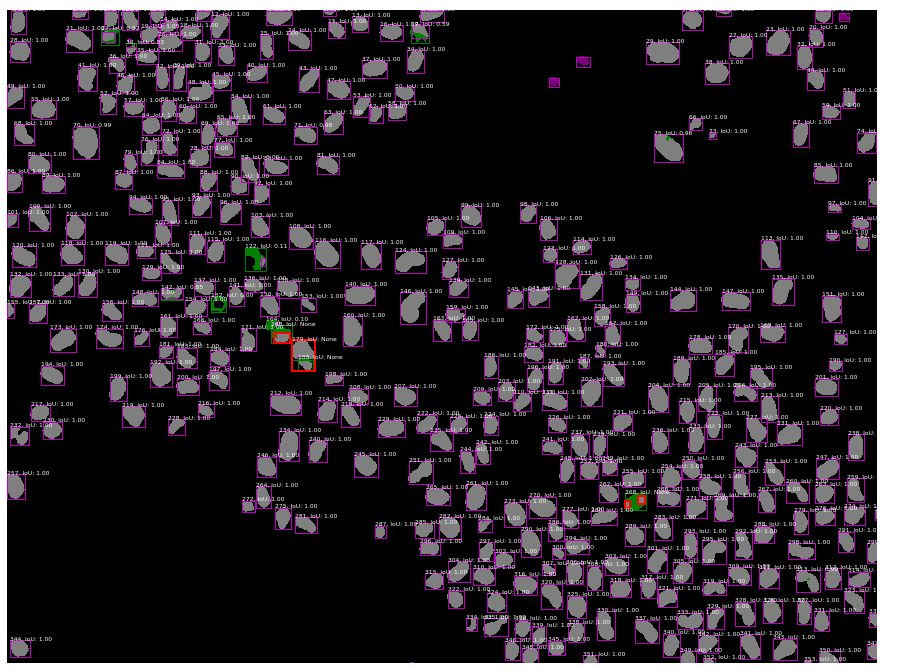

In [5]:
result.plot()

In [6]:
print(result.results)

 Segmentation Metrics (n=1)
n_true_labels: 354
n_pred_labels: 362
n_true_positives: 350
n_false_positives: 5
n_false_negatives: 0
IoU: 0.988
Jaccard: 0.986
pixel_identity: 0.998
localization_error: 1.048



### now perform the calculation with strict matching only

In [7]:
result = umetrics.calculate(y_true, y_pred, strict=True, iou_threshold=0.7)
print(result.results)

 Segmentation Metrics (n=1)
Strict: True (IoU > 0.7)
n_true_labels: 354
n_pred_labels: 362
n_true_positives: 345
n_false_positives: 10
n_false_negatives: 0
IoU: 0.999
Jaccard: 0.972
pixel_identity: 0.998
localization_error: 0.010

